## Visualizing the Global Coffee Market

### Project Summary
Here I attempt to assess the state of global coffee production and consumption. The project is mainly aimed to analyze Brazil's (largest producer of coffee in the world) production relative to other countries and compare importer volume vs. the prices they pay.

**Note:**
Coffee is the second most important commercial product that is exported by developing countries, after petroleum.

### Objectives:
1. Read in data from multiple csv files.
2. Reshape the data to prepare it for visualization.
3. Build & customize charts to communicate key insights.

### The Data Set:
The data set consists of information on coffee **production** by year for major coffee producing nations, data on coffee **imports** by various nations, data on coffee prices and data on prices paid to growers.
(Source: Kaggle; https://www.kaggle.com/datasets/shaikparvezshah/analysing-global-coffee-market, https://icocoffee.org)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [2]:
# Read in data on coffee production.
path = "Data/coffee/total-production.csv"
coffee_production = pd.read_csv(path)
coffee_production.head()

,total_production,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [3]:
# Transpose the data frame and assign proper column names.
coffee_production = coffee_production.T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.iloc[1:]
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production.

In [4]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [5]:
# Top 10 coffee producing nations
top10_producers = coffee_production.sum().sort_values(ascending = False).iloc[0:10]
top10_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

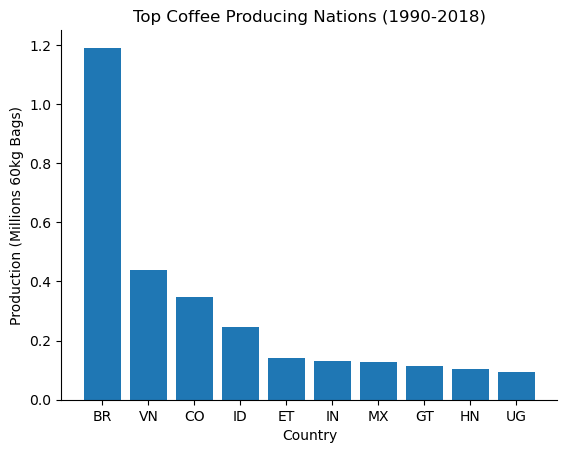

In [6]:
# Create a bar chart showing the top 10 coffee producers.
fig, ax = plt.subplots()

ax.bar(
    top10_producers.index,
    top10_producers.values / 1000000

)
ax.set_title('Top Coffee Producing Nations (1990-2018)')
ax.set_xlabel('Country')
ax.set_ylabel('Production (Millions 60kg Bags)')
ax.set_xticks(top10_producers.index)
ax.set_xticklabels(['BR', 'VN', 'CO', 'ID', 'ET', 'IN', 'MX', 'GT', 'HN', 'UG'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks
plt.show()

# Top 5 Countries Over Time

* Create a line chart with the top 5 nations producing coffee over time.

In [7]:
# Convert the index to datetime64[ns].
coffee_production.index = coffee_production.index.astype('datetime64[ns]')

In [8]:
# Create DataFrame tracking the production of top 5 countries over time.
top5 = coffee_production.loc[:, ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']]
top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


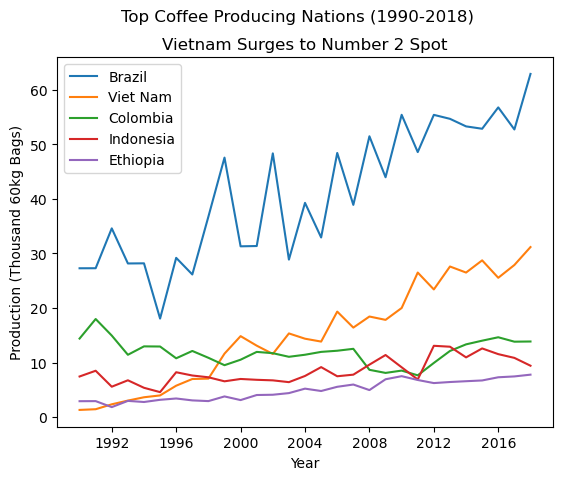

In [9]:
fig, ax = plt.subplots()
ax.plot(
    top5.index,
    top5 / 1000
)

plt.legend(top5.columns)
fig.suptitle('Top Coffee Producing Nations (1990-2018)')
ax.set_title('Vietnam Surges to Number 2 Spot')
ax.set_xlabel('Year')
ax.set_ylabel('Production (Thousand 60kg Bags)')
plt.show()

# BRAZIL'S COMPOSITION OVER TIME

* Explore how Brazil's share of global coffee production has changed over time. Build a plot that shows global total production as well as Brazil's contribution to global production over time.

In [10]:
# Create DataFrame comparing Brazil with the rest of the world.
brazil_vs_others = coffee_production.assign(
    rest_of_world = coffee_production.drop('Brazil', axis = 1).sum(axis = 1)).loc[:, ['Brazil', 'rest_of_world']].astype({'Brazil': 'float64', 'rest_of_world': 'float64'})
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990-01-01,27285.6286,65944.431
1991-01-01,27293.4934,73973.191
1992-01-01,34603.3542,63922.545
1993-01-01,28166.9786,63597.643
1994-01-01,28192.0470,65121.147


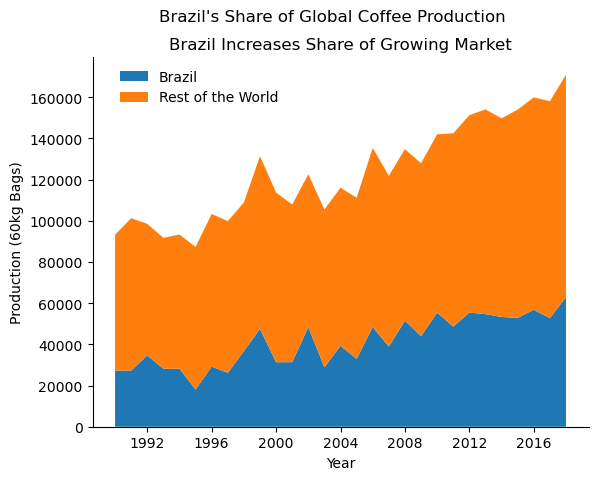

In [11]:
# Plot chart to see Brazil's composition with respect to the rest of the world.
fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index,
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world'],


)

ax.legend(['Brazil', 'Rest of the World'], bbox_to_anchor = (0.4, 1), frameon = False)
fig.suptitle("Brazil's Share of Global Coffee Production")
ax.set_title("Brazil Increases Share of Growing Market")
ax.set_xlabel('Year')
ax.set_ylabel('Production (60kg Bags)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# PRODUCTION RELATIONSHIPS

* We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

In [12]:
# Brazil vs. Vietnam Data frame.
brazil_vs_vietnam = coffee_production.loc[:, ['Brazil', 'Viet Nam']]
brazil_vs_vietnam.head()

total_production,Brazil,Viet Nam
1990-01-01,27285.6286,1310.288
1991-01-01,27293.4934,1437.848
1992-01-01,34603.3542,2340.447
1993-01-01,28166.9786,3020.216
1994-01-01,28192.047,3631.609


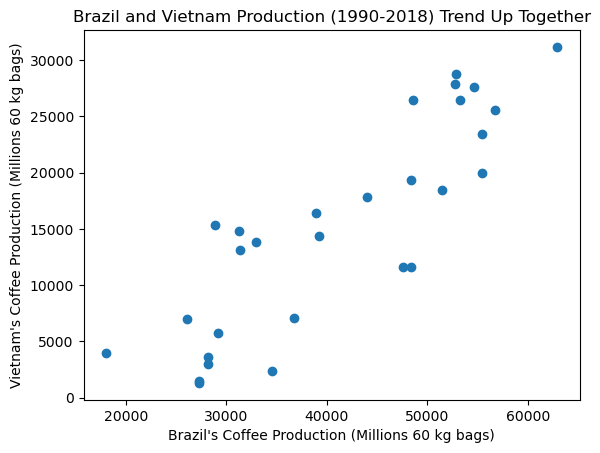

In [13]:
# Scatterplot showing Brazil-Vietnam production trend.
fig, ax = plt.subplots()

ax.scatter(
    brazil_vs_vietnam['Brazil'],
    brazil_vs_vietnam['Viet Nam']
)

ax.set_title('')
ax.set_xlabel("Brazil's Coffee Production (Millions 60 kg bags)")
ax.set_ylabel("Vietnam's Coffee Production (Millions 60 kg bags)")
ax.set_title("Brazil and Vietnam Production (1990-2018) Trend Up Together")

plt.show()

In [14]:
# Brazil vs. Venezuela Data frame.
brazil_vs_venezuela = coffee_production.loc[:, ['Brazil', 'Venezuela']]
brazil_vs_venezuela.head()

total_production,Brazil,Venezuela
1990-01-01,27285.6286,1122.477
1991-01-01,27293.4934,940.704
1992-01-01,34603.3542,1215.298
1993-01-01,28166.9786,1332.881
1994-01-01,28192.047,988.996


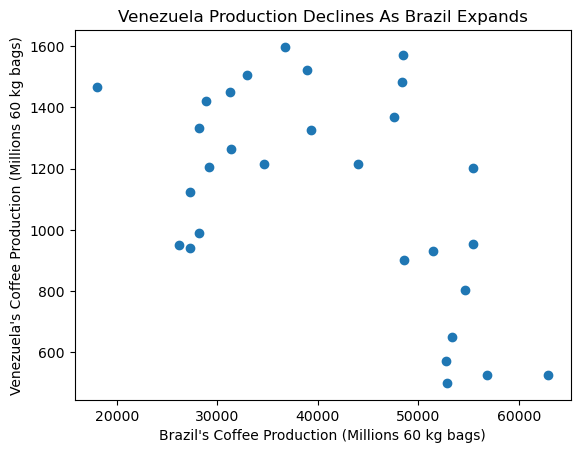

In [15]:
# Scatterplot showing Brazil-Venezuela production trend.
fig, ax = plt.subplots()

ax.scatter(
    brazil_vs_venezuela['Brazil'],
    brazil_vs_venezuela['Venezuela']
)

ax.set_title('')
ax.set_xlabel("Brazil's Coffee Production (Millions 60 kg bags)")
ax.set_ylabel("Venezuela's Coffee Production (Millions 60 kg bags)")
ax.set_title("Venezuela Production Declines As Brazil Expands")

plt.show()

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers in 2018, as well as the sum for the rest of countries.

* Create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [16]:
# Add new column to calculate the rest of the world share.
coffee_production['Rest of World'] = coffee_production.drop(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia'], axis = 1).sum(axis = 1)

In [17]:
# Dataframe to plot pie chart.
coffee_production_2018_top5 = coffee_production.loc['2018', ['Brazil', 
                               'Viet Nam', 
                               'Colombia', 
                               'Indonesia', 
                               'Ethiopia', 
                               'Rest of World'
                              ]
                     ]
coffee_production_2018_top5

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia,Rest of World
2018-01-01,62924.8836,31174.0742,13857.962,9417.5942,7776.2234,45786.0003


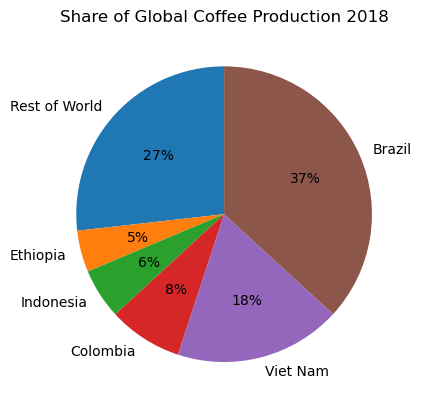

In [18]:
# Plot a pie chart with the top 5 producers in 2018, as well as the sum for the rest of countries.
fig, ax = plt.subplots()

ax.pie(
    x = coffee_production_2018_top5.values.flatten()[::-1],
    startangle = 90,
    labels = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Rest of World'][::-1],
    autopct = "%0.f%%"
)

ax.set_title('Share of Global Coffee Production 2018')
plt.show()

In [19]:
# Dataframes to plot Brazil's production in 1990 and 2018.
brazil_1990 = coffee_production.assign(
    rest_of_world = coffee_production.drop('Brazil', axis = 1).sum(axis = 1)).loc['1990', ['Brazil', 'rest_of_world']].astype({'Brazil': 'float64', 'rest_of_world': 'float64'})
brazil_2018 = coffee_production.assign(
    rest_of_world = coffee_production.drop('Brazil', axis = 1).sum(axis = 1)).loc['2018', ['Brazil', 'rest_of_world']].astype({'Brazil': 'float64', 'rest_of_world': 'float64'})

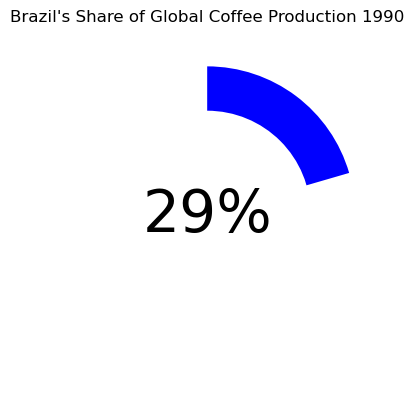

In [20]:
# Plot showing Brazil's share in 1990.
fig, ax = plt.subplots()

ax.pie(
    x = brazil_1990.values.flatten()[::-1],
    startangle = 90,
    colors = ['white', 'blue']
)

donut_hole = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(donut_hole)

ax.text(
    0,
    0,
    '29%',
    ha = 'center',
    va = 'center',
    fontsize = 42
)

ax.set_title("Brazil's Share of Global Coffee Production 1990")
plt.show()

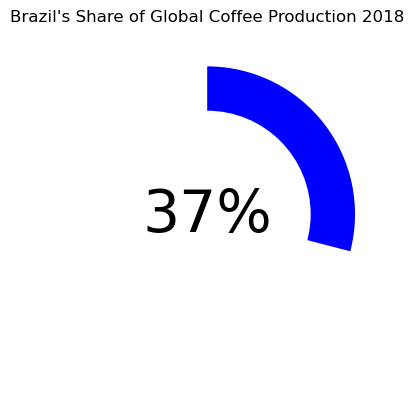

In [21]:
# Plot showing Brazil's share in 2018.
fig, ax = plt.subplots()

ax.pie(
    x = brazil_2018.values.flatten()[::-1],
    startangle = 90,
    colors = ['white', 'blue']
)

donut_hole = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(donut_hole)

ax.text(
    0,
    0,
    '37%',
    ha = 'center',
    va = 'center',
    fontsize = 42
)

ax.set_title("Brazil's Share of Global Coffee Production 2018")
plt.show()

# Coffee Consumption Vs. Prices

* Compare coffee prices with coffee consumption in countries. Is there a relationship between coffee consumption and the price these countries pay? Plot a dual axis bar chart of price vs consumption totals for these countries.

In [22]:
# Import coffee consumption data.
consumption = pd.read_csv("Data/coffee/imports.csv")


consumption.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [23]:
# Import coffee prices' data.
prices = pd.read_csv("Data/coffee/retail-prices.csv")

prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [24]:
# Reshape 'consumption' dataframe.
consumption = consumption.T
consumption.columns = consumption.iloc[0]
consumption = consumption.iloc[1:]
consumption.head()

imports,Austria,Belgium,Belgium/Luxembourg,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,...,Ukraine,USSR,Yugoslavia,North America,Canada,South America,Argentina,Chile,Suriname,Uruguay
1990,1880.0,NaN,2015.0,268.0,NaN,50.0,659.0,959.0,NaN,1095.0,...,0.0,2099.18301,1033.507,2253.478009,2253.478009,668.199002,508.360998,115.640002,1.937,42.261001
1991,2058.0,NaN,1746.0,200.0,NaN,54.0,525.0,983.0,NaN,1033.0,...,0.0,1086.817005,638.375003,2356.146011,2356.146011,748.614998,577.463999,133.958001,7.002,30.190998
1992,2206.0,NaN,1828.0,182.0,168.0,41.0,475.0,1062.0,16.0,1055.0,...,23.4,0.0,0.0,2271.012015,2271.012015,950.163006,697.761,203.930001,2.928004,45.544001
1993,1836.0,NaN,2063.0,397.0,163.0,77.0,514.0,994.0,51.0,1301.0,...,13.866684,0.0,0.0,2488.917017,2488.917017,872.028001,648.851996,187.155003,3.708001,32.313001
1994,1417.0,NaN,2262.0,463.0,193.0,52.0,554.0,1033.0,83.0,1361.0,...,83.259976,0.0,0.0,2827.129984,2827.129984,843.580006,646.416004,153.726999,3.459003,39.978


In [25]:
# Reshape 'prices' dataframe.
prices = prices.T
prices.columns = prices.iloc[0]
prices = prices.iloc[1:]
prices.head()

retail_prices,Austria,Cyprus,Denmark,Finland,France,Germany,Italy,Netherlands,Portugal,Spain,Sweden,United Kingdom,Japan,Norway
1990,10.816777,6.247241,8.410596,6.578366,8.233996,8.807947,11.721854,6.688742,9.094923,7.99117,7.571744,23.289183,22.649007,7.306843
1991,10.0883,6.181015,8.101545,6.004415,7.571744,8.476821,12.406181,6.512141,9.426049,7.726269,7.262693,22.980132,26.225166,6.975717
1992,11.015453,6.335541,8.366446,5.430464,5.099338,8.830022,12.935982,6.909492,10.927152,7.726269,6.865342,22.273731,27.85872,6.887417
1993,10.971302,5.739514,7.682119,4.282561,4.481236,7.99117,10.13245,6.181015,9.426049,6.15894,5.84989,18.631347,32.163355,5.430464
1994,10.110375,7.019868,9.8234,6.02649,5.298013,9.227373,10.331126,7.196468,9.668874,6.092715,8.366446,25.077263,32.428256,7.262693


In [26]:
# Dataframe of nations with average price and import over the years.
price_cons = pd.DataFrame()
price_cons = price_cons.assign(
    Price = prices.mean(),
    Import = consumption.mean()
).sort_values(by = 'Import', ascending = False)
price_cons

,Price,Import
retail_prices,,
Germany,9.51511,16357.666667
Japan,21.472939,6862.275235
Italy,14.199589,6696.958333
France,6.850879,6512.458333
Spain,8.029992,4046.291667
Netherlands,8.931263,2928.125
Sweden,8.05435,1620.625
Austria,11.571135,1551.083333
Finland,7.211692,1157.541667


In [27]:
# Remove 'United Kingdom' to remove Nan value and add a column to convert cents into dollars.
price_cons = price_cons.drop('United Kingdom', axis = 0).assign(price_usd = price_cons['Price']/100)
price_cons

,Price,Import,price_usd
retail_prices,,,
Germany,9.51511,16357.666667,0.095151
Japan,21.472939,6862.275235,0.214729
Italy,14.199589,6696.958333,0.141996
France,6.850879,6512.458333,0.068509
Spain,8.029992,4046.291667,0.0803
Netherlands,8.931263,2928.125,0.089313
Sweden,8.05435,1620.625,0.080544
Austria,11.571135,1551.083333,0.115711
Finland,7.211692,1157.541667,0.072117


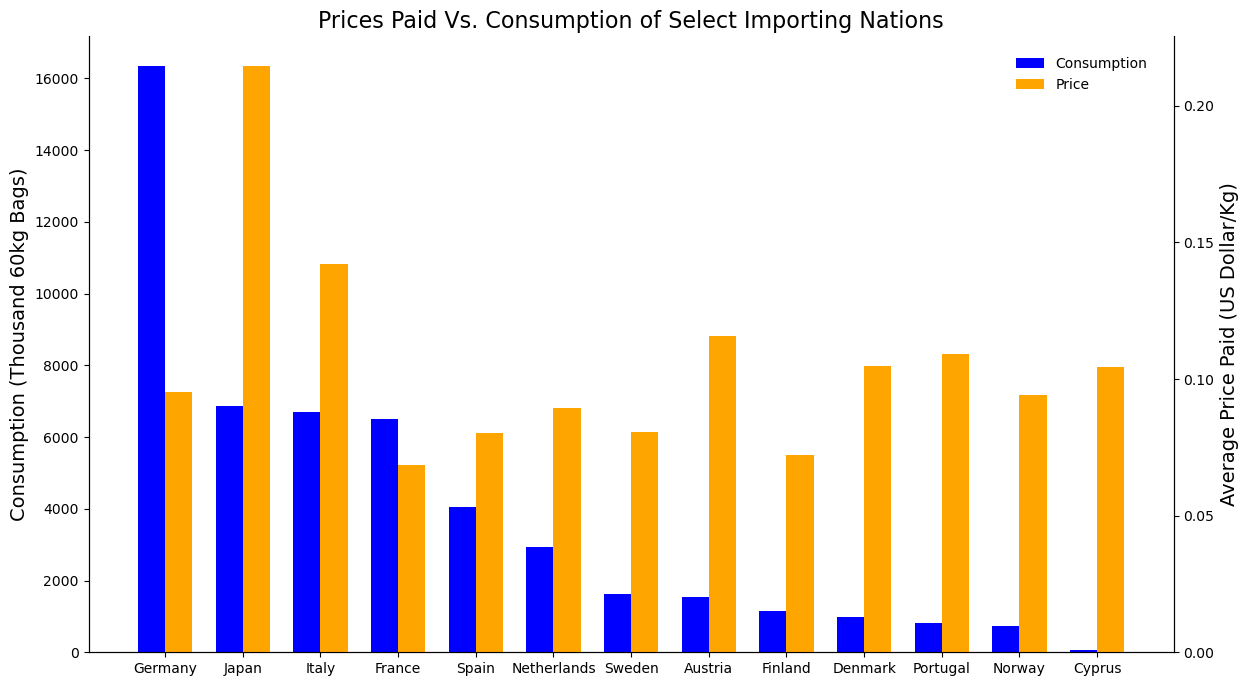

In [28]:
# Plot Consumption and Price in two different axes.
x = np.arange(len(price_cons))
width = 0.35

fig, ax = plt.subplots(figsize = (14, 8))

ax.bar(
    x - width/2, 
    price_cons['Import'],
    label = 'Consumption',
    width = width,
    color = 'blue',
)

ax2 = ax.twinx()

ax2.bar(
    x + width/2, 
    price_cons['price_usd'],
    label = 'Price',
    width = width,
    color = 'orange'
)

ax.set_xticks(x)
ax.set_xticklabels(['Germany', 'Japan', 'Italy', 'France', 'Spain', 'Netherlands', 'Sweden', 'Austria', 'Finland', 'Denmark', 'Portugal', 'Norway', 'Cyprus'], fontsize = 10)
ax.set_title('Prices Paid Vs. Consumption of Select Importing Nations', fontsize = 16)
ax.set_ylabel('Consumption (Thousand 60kg Bags)', fontsize = 14)
ax2.set_ylabel('Average Price Paid (US Dollar/Kg)', fontsize = 14)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.legend(bbox_to_anchor = (0.89, 0.87), frameon = False)
plt.show()

#### Insights From the Chart Above:

* Germany has the highest consumption. This makes sense as the German economy is large.
* Japan even though a large economy, has less consumption as compared to Germany. This should be because Japan is predominantly a tea consuming nation.
* Even though Japan and Italy have almost the same consumption, Japan pays higher price than Italy. It can also be noted that France, which has similar consumption pays even less.

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings into a single report. 
* Save the report out as an image.

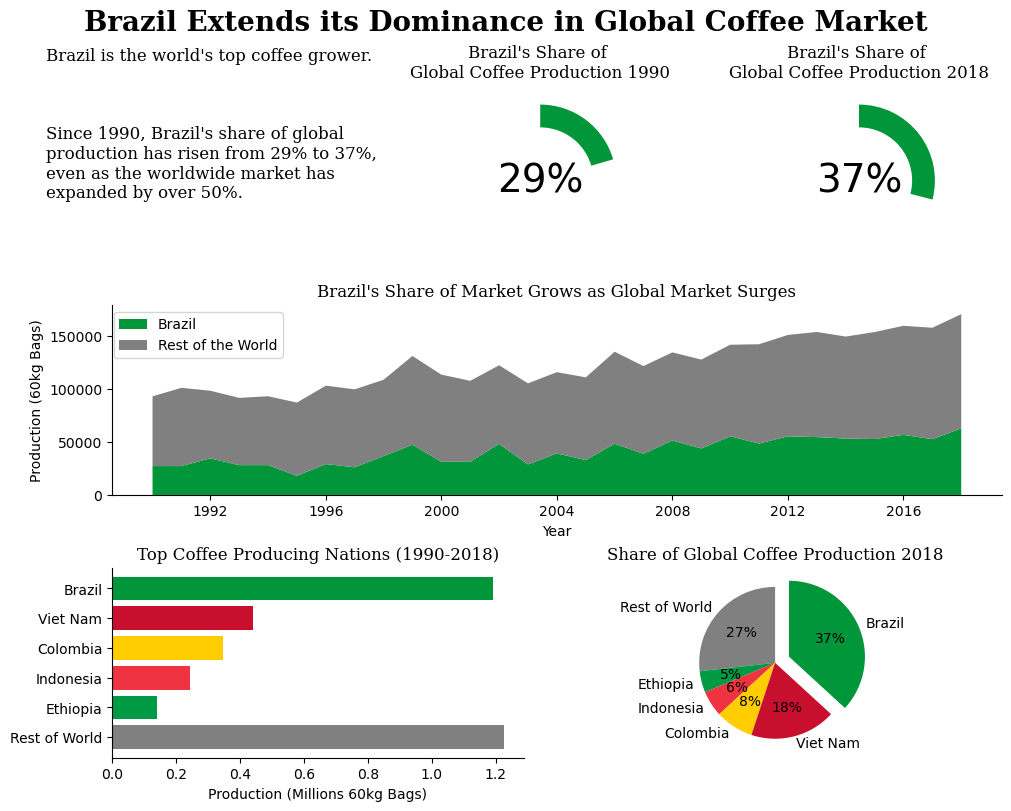

In [29]:
plt.rc('axes.spines', top = False, right = False)
fig = plt.figure(figsize = (10, 8), constrained_layout = True)
gs = gridspec.GridSpec(12, 12, figure = fig)

ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0:4, 4:8])
ax3 = fig.add_subplot(gs[0:4, 8:])
ax4 = fig.add_subplot(gs[4:8, 0:])
ax5 = fig.add_subplot(gs[8:, 0:6])
ax6 = fig.add_subplot(gs[8:, 6:])


fig.text(0.04, 0.735, 
'''Brazil is the world's top coffee grower.



Since 1990, Brazil's share of global 
production has risen from 29% to 37%, 
even as the worldwide market has 
expanded by over 50%.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

ax1.pie(
    x = brazil_1990.values.flatten()[::-1],
    startangle = 90,
    colors = ['white', 'white']
)

# Plot showing Brazil's share in 1990.
ax2.pie(
    x = brazil_1990.values.flatten()[::-1],
    startangle = 90,
    colors = ['white', '#009639']
)

donut_hole = plt.Circle((0, 0), 0.70, fc = 'white')
ax2.add_artist(donut_hole)

ax2.text(
    0,
    0,
    '29%',
    ha = 'center',
    va = 'center',
    fontsize = 28
)

ax2.set_title('''Brazil's Share of 
Global Coffee Production 1990''', fontsize = 12, fontweight='light', fontfamily='serif')

# Plot showing Brazil's share in 2018.
ax3.pie(
    x = brazil_2018.values.flatten()[::-1],
    startangle = 90,
    colors = ['white', '#009639']
)

donut_hole = plt.Circle((0, 0), 0.70, fc = 'white')
ax3.add_artist(donut_hole)

ax3.text(
    0,
    0,
    '37%',
    ha = 'center',
    va = 'center',
    fontsize = 28
)

ax3.set_title('''Brazil's Share of 
Global Coffee Production 2018''', fontsize = 12, fontweight='light', fontfamily='serif')

# Brazil's composition with respect to the rest of the world.
ax4.stackplot(
    brazil_vs_others.index,
    brazil_vs_others['Brazil'],
    brazil_vs_others['rest_of_world'],
    colors = ['#009639', 'grey']


)

ax4.legend(['Brazil', 'Rest of the World'], bbox_to_anchor = (0.2, 1))
ax4.set_title("Brazil's Share of Market Grows as Global Market Surges", fontsize = 12, fontweight='light', fontfamily='serif')
ax4.set_xlabel('Year')
ax4.set_ylabel('Production (60kg Bags)')

# Bar chart showing the top 5 coffee producers.
top5_countries = coffee_production.loc[:, ['Rest of World', 'Ethiopia', 'Indonesia', 'Colombia', 'Viet Nam', 'Brazil']].sum(axis = 0)
colors = ["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639"]

ax5.barh(
    top5_countries.index,
    top5_countries.values / 1000000,
    color = colors

)

ax5.set_xlabel('Production (Millions 60kg Bags)')
ax5.set_title('Top Coffee Producing Nations (1990-2018)', fontsize = 12, fontweight='light', fontfamily='serif')

# Pie chart showing the composition of the top 5 coffee producers.
coffee_production_2018_top_nations = coffee_production.loc['2018', ['Rest of World', 'Ethiopia', 'Indonesia', 'Colombia', 'Viet Nam', 'Brazil']]
color_2 = ["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639"]

ax6.pie(
    x = coffee_production_2018_top_nations.values.flatten(),
    startangle = 90,
    colors = color_2,
    autopct = "%.0f%%",
    labels = ['Rest of World', 'Ethiopia', 'Indonesia', 'Colombia', 'Viet Nam', 'Brazil'],
    explode = (0, 0, 0, 0, 0, 0.2)
)

ax6.set_title('Share of Global Coffee Production 2018', fontsize = 12, fontweight='light', fontfamily='serif')

fig.suptitle('Brazil Extends its Dominance in Global Coffee Market', fontsize=20, fontweight="bold", fontfamily='serif')
plt.show()
fig.savefig('Brazil Market')

# Compare Price Paid to Growers in Major Nations

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [30]:
# Import 'prices-paid-to-growers.csv', transpose the table and assign appropriate columns.
prices_paid_to_growers = pd.read_csv("Data/coffee/prices-paid-to-growers.csv").T
prices_paid_to_growers.columns = prices_paid_to_growers.iloc[0]
prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,0.984254,1.348565,0.978921,0.645267,0.166486
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.789049,1.505322,0.897289,0.632307,0.26143
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.803461,1.351128,0.877945,0.658494,0.197653
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,0.97595,1.362442,0.975912,0.499857,0.259737
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.207448,2.418234,1.246437,0.573784,0.919709


In [31]:
# Add a column to calculate the price paid for the rest of the world.
prices_paid_to_growers['Other Nations'] = prices_paid_to_growers.drop(['Brazil', 'Colombia', 'Ethiopia'], axis = 1).mean(axis = 1)

In [32]:
prices_paid_to_growers_top_nations = prices_paid_to_growers.loc[:, ['Brazil', 'Colombia', 'Ethiopia', 'Other Nations']]
prices_paid_to_growers_top_nations.head()

prices_paid_to_growers,Brazil,Colombia,Ethiopia,Other Nations
1990,0.984254,1.534724,1.348565,0.943624
1991,0.789049,1.48179,1.505322,0.964325
1992,0.803461,1.204656,1.351128,0.761219
1993,0.97595,1.106477,1.362442,0.806986
1994,2.207448,1.898327,2.418234,1.585565


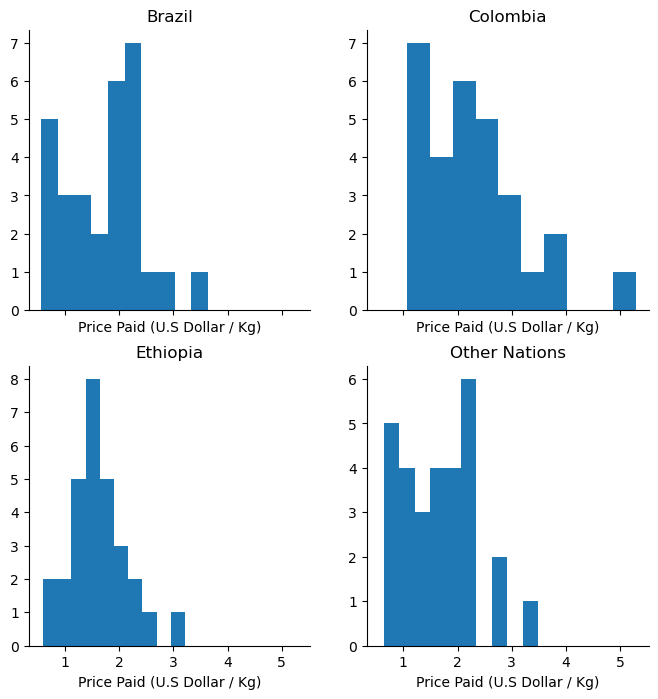

In [33]:
# Create subplots of histograms
fig, ax = plt.subplots(2,2, figsize = (8, 8), sharex = 'all')

ax[0,0].hist(
    prices_paid_to_growers_top_nations.loc[:, 'Brazil']
)
ax[0,0].set_title('Brazil')
ax[0, 0].set_xlabel('Price Paid (U.S Dollar / Kg)')

ax[0,1].hist(
    prices_paid_to_growers_top_nations.loc[:, 'Colombia']
)
ax[0,1].set_title('Colombia')
ax[0, 1].set_xlabel('Price Paid (U.S Dollar / Kg)')

ax[1,0].hist(
    prices_paid_to_growers_top_nations.loc[:, 'Ethiopia']
)
ax[1,0].set_title('Ethiopia')
ax[1, 0].set_xlabel('Price Paid (U.S Dollar / Kg)')

ax[1,1].hist(
    prices_paid_to_growers_top_nations.loc[:, 'Other Nations']
)
ax[1,1].set_title('Other Nations')
ax[1, 1].set_xlabel('Price Paid (U.S Dollar / Kg)')

plt.show()